# Stock price prediction using Machine Learning

In [1]:
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=yf.download("AAPL",start="2010-01-01",end="2019-12-31")

[*********************100%%**********************]  1 of 1 completed


In [3]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.461977,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.473148,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.370185,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.358407,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.400681,447610800


In [4]:
 # Convert Series to a Data Frame
df=df["Close"].to_frame()
df.head()

,Close
Date,
2010-01-04,7.643214
2010-01-05,7.656429
2010-01-06,7.534643
2010-01-07,7.520714
2010-01-08,7.570714


In [5]:
df["Close in 10 changes"]=df["Close"].shift(-10)

In [7]:
df.head(20)

,Close,Close in 10 changes
Date,,
2010-01-04,7.643214,7.680000
2010-01-05,7.656429,7.561786
2010-01-06,7.534643,7.431071
2010-01-07,7.520714,7.062500
2010-01-08,7.570714,7.252500
2010-01-11,7.503929,7.355000
2010-01-12,7.418571,7.424286
2010-01-13,7.523214,7.117500
2010-01-14,7.479643,6.859286


In [8]:
dfc = df.iloc[:-10,:]

In [9]:
x=dfc["Close"].values.reshape(dfc.shape[0],1)
y=dfc["Close in 10 changes"].values

In [10]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [11]:
rf = RandomForestRegressor(n_estimators=500)
rf.fit(x_train, y_train)
y_pred=rf.predict(x_test)
np.sqrt(mean_squared_error(y_test,y_pred))

1.7921629197987257

In [12]:
y_act_10=dfc.iloc[-10:,:]["Close in 10 changes"].values

In [13]:
y_pred_10=rf.predict(dfc.iloc[-10:,:]["Close"].values.reshape(10,1))

In [14]:
y_act_10

array([69.96499634, 70.10250092, 69.93499756, 70.00499725, 69.86000061,
       71.        , 71.06749725, 72.47750092, 72.44999695, 72.87999725])

In [15]:
y_pred_10

array([67.39138773, 68.59346117, 66.66488734, 67.44648375, 70.65014531,
       69.1814054 , 69.68209807, 71.74426044, 72.13244827, 72.5408726 ])

In [16]:
y_act_10-y_pred_10

array([ 2.57360861,  1.50903975,  3.27011021,  2.5585135 , -0.7901447 ,
        1.8185946 ,  1.38539919,  0.73324048,  0.31754868,  0.33912465])

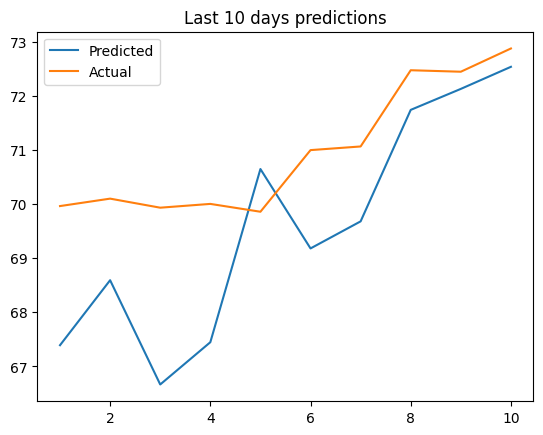

In [18]:
plt.plot(range(1,11),y_pred_10)
plt.plot(range(1,11),y_act_10)
plt.legend(["Predicted","Actual"])
plt.title("Last 10 days predictions")
plt.show()